In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# set the parameters for the grid world
grid_size = 5
num_actions = 4
obstacles = [(2, 4), (2, 3), (2, 2), (3, 2)]
terminal_state = (4, 4)
jump_start_state = (1, 3)
jump_end_state = (3, 3)
jump_reward = 5


In [3]:
# set the parameters for the Q-learning algorithm
num_episodes = 100
max_steps_per_episode = 100
learning_rate = 0.1
discount_factor = 0.99
exploration_rate = 0.8
exploration_decay_rate = 0.99

In [13]:
# define a function to get the next state and reward based on the current state and action


def get_next_state_and_reward(state, action):
    # calculate the next state based on the action
    if action == 0:  # up
        next_state = (state[0]-1, state[1])
    elif action == 1:  # down
        next_state = (state[0]+1, state[1])
    elif action == 2:  # left
        next_state = (state[0], state[1]-1)
    elif action == 3:  # right
        next_state = (state[0], state[1]+1)

    # check if the agent has hit a wall or obstacle, return current state and -1 reward
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size or next_state in obstacles:
        return state, -1

    # check if the agent has reached the terminal state or jump end state, return state and 10 reward
    if next_state == terminal_state or next_state == jump_reward:
        return next_state, 10

    # check if the agent has reached the jump start state, return jump end state and jump reward
    if state == jump_start_state:
        return jump_end_state, jump_reward

    # for all other states, return next state and -1 reward
    return next_state, -1


# create the Q-table with zeros
q_table = np.zeros((grid_size, grid_size, num_actions))

# create lists to store the episode rewards and exploration rate for each episode
episode_rewards = []
exploration_rates = []

# loop through each episode
for episode in range(num_episodes):
    # reset the agent's position and the episode's cumulative reward
    agent_pos = [2, 1]
    cumulative_reward = 0

    # reduce the exploration rate for the current episode
    exploration_rate *= exploration_decay_rate

    # loop through the steps in the episode
    for step in range(max_steps_per_episode):
        # choose whether to explore or exploit based on the exploration rate
        if np.random.uniform() < exploration_rate:
            action = np.random.choice(range(num_actions))
        else:
            action = np.argmax(q_table[agent_pos[0], agent_pos[1], :])

        # get the next state and reward based on the current state and action
        next_pos, reward = get_next_state_and_reward(agent_pos, action)

        # update the Q-value for the current state and action
        q_value = q_table[agent_pos[0], agent_pos[1], action]
        next_q_max = np.max(q_table[next_pos[0], next_pos[1], :])
        new_q_value = (1 - learning_rate) * q_value + \
                      learning_rate * (reward + discount_factor * next_q_max)
        q_table[agent_pos[0], agent_pos[1], action] = new_q_value

        # move the agent to the next state and add the reward to the cumulative reward
        agent_pos = next_pos
        cumulative_reward += reward

        # break if the agent has reached the terminal state
        if agent_pos == terminal_state:
            break

    # append the cumulative reward and exploration rate for the episode to the lists
    episode_rewards.append(cumulative_reward)
    exploration_rates.append(exploration_rate)

# calculate the state visit frequency over all episodes
visit_freq_all = np.zeros((grid_size, grid_size, num_actions))
for episode in range(num_episodes):
    agent_pos = [2, 1]
    visit_freq = np.zeros((grid_size, grid_size, num_actions))
    for step in range(max_steps_per_episode):
        action = np.argmax(q_table[agent_pos[0], agent_pos[1], :])
        visit_freq[agent_pos[0], agent_pos[1], action] += 1
        agent_pos, _ = get_next_state_and_reward(agent_pos, action)
        if agent_pos == terminal_state:
            break
    visit_freq_all += visit_freq

# calculate the state visit probability over all episodes
visit_prob = np.mean(visit_freq_all, axis=2) / \
             np.sum(visit_freq_all, axis=2).max()

# print the Q-table
print(q_table)

[[[-0.89640839 -0.81678356 -0.88657748 -0.85050981]
  [-0.68981171  0.86901137 -0.82929773 -0.66671064]
  [-0.31973917  2.20440326 -0.67091266 -0.33461453]
  [-0.1         0.25847674 -0.11881    -0.1       ]
  [-0.1        -0.1        -0.1049995   0.        ]]

 [[-0.92595674 -0.96611541 -0.94297858  4.97193991]
  [-0.92350968  0.38091363  0.11548767 11.1905058 ]
  [-0.45939241  4.10644092  3.2695265  12.538453  ]
  [13.77261821  1.76990919  2.0623014   4.61001703]
  [-0.1         0.          0.          0.        ]]

 [[-0.66184327 -1.16475672 -1.18919276 -1.20735959]
  [ 9.59833565 -1.3004728  -1.61970682 -0.4043482 ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]]

 [[-0.94293836 -0.91196102 -0.96755759 -0.99356954]
  [-0.92099935 -0.82214822 -0.89606289 -0.98073568]
  [ 0.          0.          0.          0.        ]
  [ 0.28023567  8.89491999  2.42774332  0.396944  ]
  [-0.

In [14]:
# print the state visit probabilities
for row in range(grid_size):
    for col in range(grid_size):
        state = (row, col)
        q_values = q_table[row, col, :]
        action_values = {}
        for action, q_value in enumerate(q_values):
            action_values[action] = q_value
        print(f"{state}: {action_values}")


(0, 0): {0: -0.8964083874125919, 1: -0.8167835604241045, 2: -0.8865774798587455, 3: -0.8505098057583665}
(0, 1): {0: -0.689811711836201, 1: 0.8690113661460136, 2: -0.8292977299680653, 3: -0.6667106368987811}
(0, 2): {0: -0.31973916846762174, 1: 2.2044032619211373, 2: -0.6709126590652976, 3: -0.3346145260176673}
(0, 3): {0: -0.1, 1: 0.2584767433545261, 2: -0.11881, 3: -0.1}
(0, 4): {0: -0.1, 1: -0.1, 2: -0.10499950000000001, 3: 0.0}
(1, 0): {0: -0.9259567419115942, 1: -0.9661154110102697, 2: -0.9429785764970596, 3: 4.97193991143358}
(1, 1): {0: -0.9235096836418912, 1: 0.3809136285057644, 2: 0.11548767169036742, 3: 11.190505801450014}
(1, 2): {0: -0.4593924111577856, 1: 4.106440917518626, 2: 3.269526500339392, 3: 12.538452998342901}
(1, 3): {0: 13.772618209340266, 1: 1.7699091906102409, 2: 2.0623013997209663, 3: 4.610017028923925}
(1, 4): {0: -0.1, 1: 0.0, 2: 0.0, 3: 0.0}
(2, 0): {0: -0.661843268482794, 1: -1.1647567171609634, 2: -1.1891927610722683, 3: -1.2073595904542083}
(2, 1): {0: 9

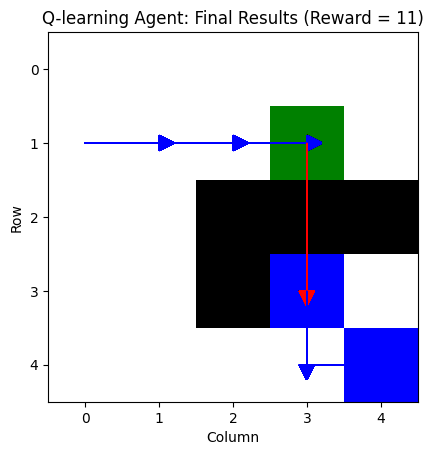

In [15]:
# create the heatmap for the agent's movement on the grid
grid = np.zeros((grid_size, grid_size))
grid[terminal_state[0], terminal_state[1]] = 1
grid[jump_start_state[0], jump_start_state[1]] = 3
grid[jump_end_state[0], jump_end_state[1]] = 1
for obstacle in obstacles:
    grid[obstacle[0], obstacle[1]] = 4

fig, ax = plt.subplots()
cmap = colors.ListedColormap(['white', 'blue', 'purple', 'green', 'black'])
bounds = [0, 1, 2, 3, 4, 5]
norm = colors.BoundaryNorm(bounds, cmap.N)
ax.imshow(grid, cmap=cmap, norm=norm)


# plot the agent's movements on the grid for each episode
for episode in range(num_episodes):
    agent_pos = [1, 0]                                      # Start Position
    for step in range(max_steps_per_episode):
        action = np.argmax(q_table[agent_pos[0], agent_pos[1], :])
        next_pos, _ = get_next_state_and_reward(agent_pos, action)
        if agent_pos == jump_start_state:
            plt.arrow(agent_pos[1], agent_pos[0], next_pos[1]-agent_pos[1], next_pos[0]-agent_pos[0],
                      head_width=0.2, head_length=0.2, color='r')
        else:
            plt.arrow(agent_pos[1], agent_pos[0], next_pos[1]-agent_pos[1], next_pos[0]-agent_pos[0],
                      head_width=0.2, head_length=0.2, color='b')
        agent_pos = next_pos
        if agent_pos == terminal_state:
            break

# show the heatmap and agent's movements on the grid
plt.title(f"Q-learning Agent: Final Results (Reward = {cumulative_reward})")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

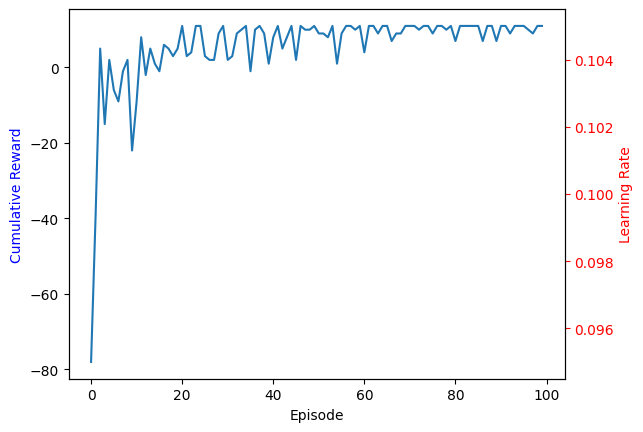

In [16]:
fig2, ax1 = plt.subplots()
ax1.plot(episode_rewards)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Cumulative Reward', color='b')
ax2 = ax1.twinx()
ax2.plot(learning_rate, color='r')
ax2.set_ylabel('Learning Rate', color='r')
ax2.tick_params(axis='y', colors='r')
plt.show()

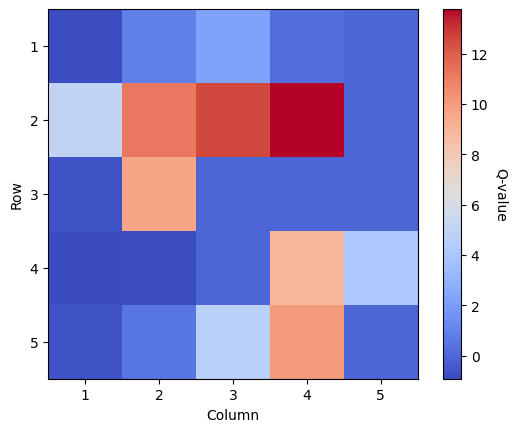

In [17]:
# create the heatmap for the Q-values
fig, ax = plt.subplots()
im = ax.imshow(q_table.max(axis=2), cmap='coolwarm')
ax.set_xticks(np.arange(grid_size))
ax.set_yticks(np.arange(grid_size))
ax.set_xticklabels(np.arange(1, grid_size+1))
ax.set_yticklabels(np.arange(1, grid_size+1))
ax.set_xlabel('Column')
ax.set_ylabel('Row')
cbar = ax.figure.colorbar(im)
cbar.ax.set_ylabel('Q-value', rotation=-90, va='bottom')

# show the plot
plt.show()